### House price prediction

##### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')

In [130]:
data.shape  # there are 1460 rows and 81 columns

(1460, 81)

In [132]:
data.isnull().sum()   ## missing values in each column

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
                ... 
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageArea         0
GarageQual        81
GarageCond   

Drop columns which has (null_values>500)

In [133]:
drop=[]
for i in data.columns:
    if data[i].isnull().sum()>500:
        drop.append(i)
data.drop(drop,axis=1,inplace=True)

In [134]:
data.shape

(1460, 76)

separating numerical and categorical 

In [136]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=='O' or data[i].nunique()<5:
        cat.append(i)
    else:
        num.append(i)
data_cat=data.loc[:,cat]
data_num=data.loc[:,num]    

seperating null and not_null for categorical varibles

In [137]:
null=[]
not_null=[]
for i in data_cat.columns:
    if data[i].isnull().sum()>0:
        null.append(i)
    else:
        not_null.append(i)

seperate categorical columns with null_values

In [109]:
data_cat.loc[:,null].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

Mode imputation for 'Electrical' column

In [138]:
data_cat["Electrical"].fillna(data_cat["Electrical"].mode()[0],inplace=True)

In [139]:
null=[]
not_null=[]
for i in data_cat.columns:
    if data_cat[i].isnull().sum()>0:
        null.append(i)
    else:
        not_null.append(i)

In [112]:
data_cat.loc[:,null].isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [113]:
data_cat.loc[:,not_null].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
KitchenAbvGr     0
KitchenQual      0
Functional       0
Fireplaces       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

create dummies for categorical varibles

In [140]:
data_null=pd.get_dummies(data_cat.loc[:,null])
data_not_null=pd.get_dummies(data_cat.loc[:,not_null],drop_first=True)

In [141]:
data_cat_new=pd.concat([data_not_null,data_null],axis=1)

shape of the dataset after creating dummies

In [117]:
data_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BedroomAbvGr       0
TotRmsAbvGrd       0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Drop the column- garageYrBuilt(there are some null values in 'Garageyrblt' and the year garage built is before than the year house built)

In [144]:
data_num.drop("GarageYrBlt",inplace=True,axis=1)

Filling missing values with Zero(as they are not present)

In [145]:
data_num["MasVnrArea"].fillna(0,inplace=True)
data_num["LotFrontage"].fillna(0,inplace=True)

In [147]:
data_new=pd.concat([data_num,data_cat_new],axis=1)

In [148]:
data_new.shape

(1460, 243)

In [149]:
data_new.isnull().sum().sum()

0

#### feature engineering

In [123]:
data_new["Total_Sqft"]=data_new["1stFlrSF"]+data["2ndFlrSF"]
data_new.drop(["1stFlrSF","2ndFlrSF"],inplace=True,axis=1)

In [124]:
data_new["TotalBathroom"]=data_new["FullBath"]+0.5*data_new["HalfBath"]
data_new["TotalBasementBathroom"]=data_new["BsmtFullBath"]+0.5*data_new["BsmtHalfBath"]
data_new.drop(["FullBath","HalfBath","BsmtFullBath","BsmtHalfBath"],axis=1,inplace=True)

In [23]:
#data_new.to_csv("train_new.csv",index=False)

In [3]:
data_new=pd.read_csv("train_new.csv")
data_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Total_Sqft,TotalBathroom,TotalBasementBathroom
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,1,0,0,0,0,1,1710,2.5,1.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,1,0,0,0,0,1,1262,2.0,0.5
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,1,0,0,0,0,1,1786,2.5,1.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,1,0,0,0,0,1,1717,1.0,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,1,0,0,0,0,1,2198,2.5,1.0


In [4]:
data_new.isnull().sum().sum()

0

##### Import Error metrics

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV,RidgeCV

User defined function for mean_absolute_percentage_error

In [11]:
def mean_absolute_percentage_error(y_true,y_pred):
     return np.mean(np.abs((y_true-y_pred)/y_true))*100

Train and test split

In [7]:
x=data_new.drop(['SalePrice',"Id"],axis=1)
y=data_new["SalePrice"]
y_log=np.log(data_new["SalePrice"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)

Lasso regression

In [12]:
model_lasso=LassoCV(cv=5)
model_lasso.fit(x_train,y_train)
pred_lasso=model_lasso.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(pred_lasso,y_test)))
print('MAPE ',mean_absolute_percentage_error(y_test,pred_lasso))

RMSE  34478.952581736026
MAPE  13.904672194579337


lasso Regression (with log_trasform)

In [13]:
model_lasso_log=LassoCV(cv=5)
model_lasso_log.fit(x_train,y_train_log)
pred_lasso_log=model_lasso_log.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_lasso_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_lasso_log)))

RMSE  33183.70411131913
MAPE  12.65083265871417


In [ ]:
x.shape

In [ ]:
len(coef[coef==0])

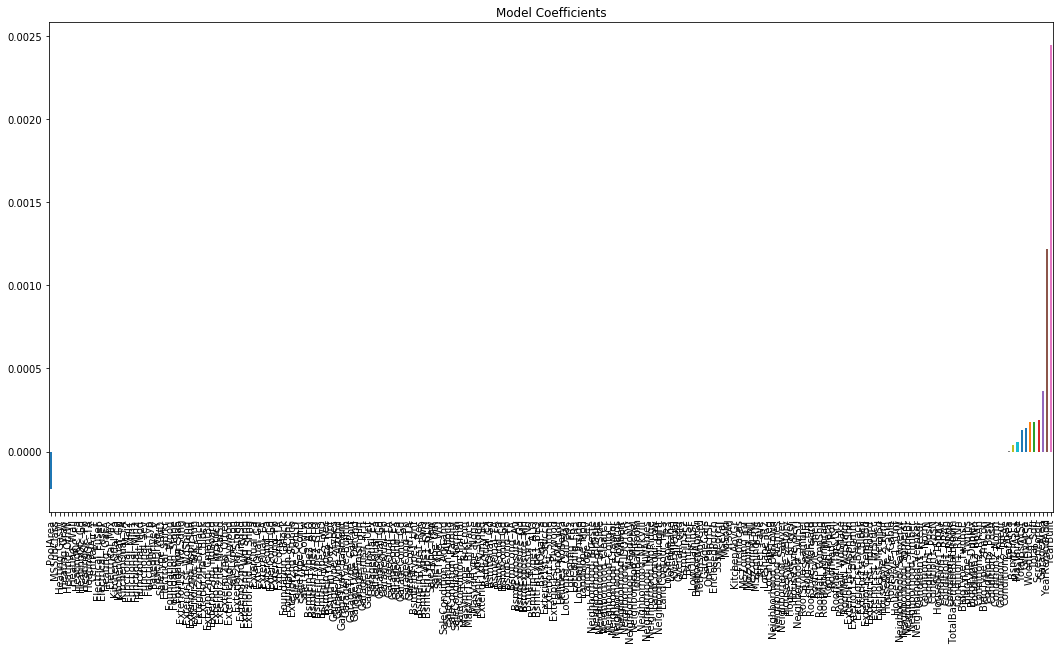

In [14]:
predictors=x_train.columns
coef=pd.Series(model_lasso_log.coef_,predictors).sort_values()
plt.figure(figsize=(18,9))
coef.plot(kind='bar',title='Model Coefficients')

Ridge_regression

In [29]:
model_ridge=RidgeCV(cv=5)
model_ridge.fit(x_train,y_train)
pred_ridge=model_ridge.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(pred_ridge,y_test)))
print('MAPE ',mean_absolute_percentage_error(y_test,pred_ridge))

RMSE  24009.97205786765
MAPE  10.664561851076824


Ridge_ regression with log_transform

In [30]:
model_ridge_log=RidgeCV(cv=5)
model_ridge_log.fit(x_train,y_train_log)
pred_ridge_log=model_ridge_log.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_ridge_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_ridge_log)))

RMSE  23163.80433297918
MAPE  9.756566937962779


Linear_regression 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()
model.fit(x_train,y_train)
pred_linear=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(pred_linear,y_test)))
print('MAPE ',mean_absolute_percentage_error(y_test,pred_linear))

RMSE  39451.487108408386
MAPE  12.280745458624763


In [17]:
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  22759.24472530326
MAPE  9.464790293904016


In [18]:
data_new.drop(["3SsnPorch"],axis=1,inplace=True)

In [19]:
print(np.corrcoef(data_new["BsmtFinSF1"],data_new["SalePrice"])[0,1])
print(np.corrcoef(data_new["BsmtFinSF2"],data_new["SalePrice"])[0,1])

0.3864198062421531
-0.011378121450215137


In [20]:
print(np.corrcoef(data_new["BsmtFinSF1"]+data_new["BsmtFinSF2"],data_new["SalePrice"])[0,1])

0.36632769193495623


In [21]:
data_new.drop("BsmtFinSF2",inplace=True,axis=1)

In [22]:
x=data_new.drop(['SalePrice',"Id"],axis=1)
y=data_new["SalePrice"]
y_log=np.log(data_new["SalePrice"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  22784.39288466684
MAPE  9.461058741879933


In [23]:
data_new.drop("BsmtFinSF1",inplace=True,axis=1)

In [24]:
x=data_new.drop(['SalePrice',"Id"],axis=1)
y=data_new["SalePrice"]
y_log=np.log(data_new["SalePrice"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  22767.25291790456
MAPE  9.460636594386822


In [25]:
data_new.drop("LowQualFinSF",inplace=True,axis=1)

In [26]:
x=data_new.drop(['SalePrice',"Id"],axis=1)
y=data_new["SalePrice"]
y_log=np.log(data_new["SalePrice"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  22767.252917904534
MAPE  9.460636594386687


In [27]:
data_new.drop("MiscVal",axis=1,inplace=True)

In [28]:
x=data_new.drop(['SalePrice',"Id"],axis=1)
y=data_new["SalePrice"]
y_log=np.log(data_new["SalePrice"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  22770.143730670872
MAPE  9.46034339344258


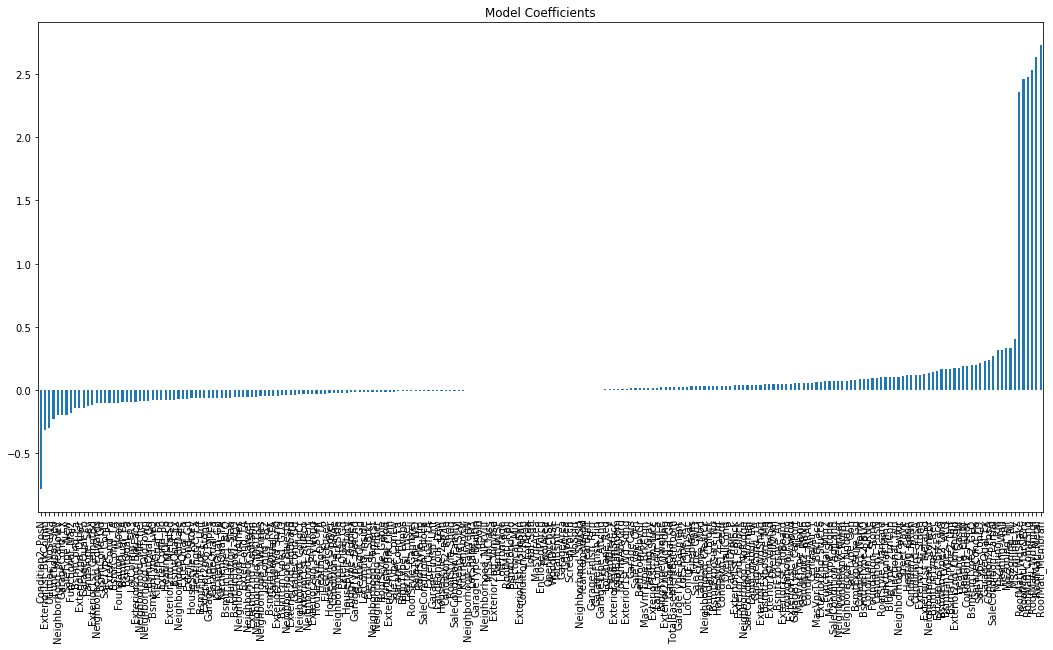

In [45]:
predictors=x_train.columns
coef=pd.Series(model.coef_,predictors).sort_values()
plt.figure(figsize=(18,9))
coef.plot(kind='bar',title='Model Coefficients')

In [46]:
x.shape

(1460, 233)

In [99]:
drop=coef[(coef>0.5) | (coef<-0.5)].index
drop

Index(['Condition2_PosN', 'RoofMatl_WdShake', 'RoofMatl_Tar&Grv',
       'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'RoofMatl_Metal',
       'RoofMatl_Membran'],
      dtype='object')

In [100]:
x.drop(drop,axis=1,inplace=True)

In [47]:
x_train.shape

(1022, 233)

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  22770.143730671476
MAPE  9.460343393442546


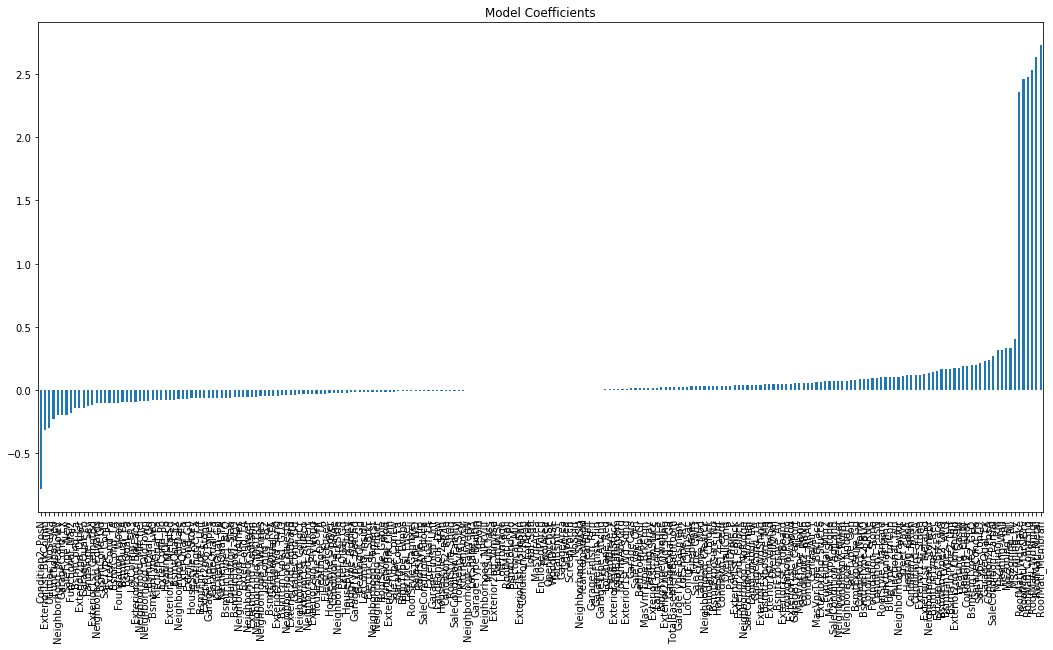

In [49]:
predictors=x_train.columns
coef=pd.Series(model.coef_,predictors).sort_values()
plt.figure(figsize=(18,9))
coef.plot(kind='bar',title='Model Coefficients')

# using neural network

In [92]:
from keras.models import Sequential,K
from keras.layers import Dense, BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [98]:
K.clear_session()
model=Sequential()
model.add(Dense(units=32,activation='relu',kernel_initializer='normal',input_shape=(233,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=64,activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=32,activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=16,activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=8,activation='relu',kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=1,activation='linear'))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                7488      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
__________

In [99]:
model.fit(x,y, validation_split=0.2, epochs=10)

Train on 1168 samples, validate on 292 samples
Epoch 1/10
1168/1168 [==============================] - 5s 4ms/step - loss: 38819444034.6301 - val_loss: 39918523826.8493
Epoch 2/10
1168/1168 [==============================] - 0s 160us/step - loss: 38819394265.4247 - val_loss: 39918468727.2329
Epoch 3/10
1168/1168 [==============================] - 0s 152us/step - loss: 38819334901.4795 - val_loss: 39918393989.2603
Epoch 4/10
1168/1168 [==============================] - 0s 155us/step - loss: 38819234633.6438 - val_loss: 39918252088.1096
Epoch 5/10
1168/1168 [==============================] - 0s 148us/step - loss: 38819065519.3425 - val_loss: 39917954707.2877
Epoch 6/10
1168/1168 [==============================] - 0s 153us/step - loss: 38818821162.0822 - val_loss: 39917430587.6164
Epoch 7/10
1168/1168 [==============================] - 0s 158us/step - loss: 38818546449.5342 - val_loss: 39917180843.8356
Epoch 8/10
1168/1168 [==============================] - 0s 162us/step - loss: 388181531

In [79]:
np.sqrt(1060828291)

32570.359086138425

In [133]:
data_new["Total_Sqft"].head(5)

0    1710
1    1262
2    1786
3    1717
4    2198
Name: Total_Sqft, dtype: int64

In [38]:
x=data_new.loc[:,["LotArea","Total_Sqft","TotalBsmtSF"]]
y=data_new["SalePrice"]
y_log=np.log(data_new["SalePrice"])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1234)
x_train,x_test,y_train_log,y_test_log=train_test_split(x,y_log,test_size=0.3,random_state=1234)
model=LinearRegression()
model.fit(x_train,y_train_log)
pred_log=model.predict(x_test)
print('RMSE ',np.sqrt(mean_squared_error(np.exp(pred_log),np.exp(y_test_log))))
print('MAPE ',mean_absolute_percentage_error(np.exp(y_test_log),np.exp(pred_log)))

RMSE  42451.670691662024
MAPE  18.288085999857337


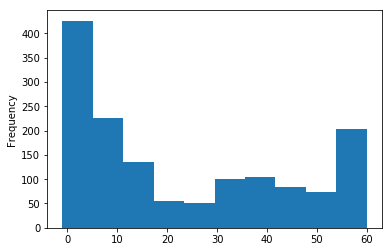

In [111]:
(data_new["YrSold"]-data_new["YearRemodAdd"]).plot(kind='hist')

In [116]:
np.corrcoef(data_new["YearRemodAdd"],data_new["YearBuilt"])

array([[1.        , 0.59285498],
       [0.59285498, 1.        ]])

In [119]:
np.corrcoef(data_new["SalePrice"],(data_new["YrSold"]-data_new["YearRemodAdd"]))

array([[ 1.        , -0.50907874],
       [-0.50907874,  1.        ]])

In [122]:
data_new[data_new["YearRemodAdd"]==data_new["YearBuilt"]].shape

(764, 235)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rand_regr=RandomForestRegressor()
parameters={'n_estimators' : [100, 300, 500, 800, 1200],
            'max_depth' : [5, 8, 15, 25, 30],
            'min_samples_split' : [2, 5, 10, 15, 100],
            'min_samples_leaf' : [1, 2, 5, 10] 
            }
gsearch2b.fit(x_train, y_train)
print("gsearch2b.best_params_",gsearch2b.best_params_)
print("gsearch2b.best_score_",gsearch2b.best_score_)

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [32]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [33]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = random_grid, n_iter = 100, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)

In [34]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [35]:
predict = rf_random.predict(x_test)

In [40]:
print('RMSE ',np.sqrt(mean_squared_error(np.exp(predict),np.exp(y_test))))

C:\Users\Megha Deepika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
from sklearn.metrics import SCORERS 

In [57]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])